## Análises sobre presença de negros e pardos nas Universidades Brasileiras
##### Análises feitas por Rafael Ressel Flores

### 1. Importação de pacotes 
- Esta etapa consistiu em importar os pacotes para serem utilizados na manipulação, visualização e análise dos dados.

In [1]:
# Importação de pacotes para manipulação e visualização dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

### 2. Construção do dataset
- Nesta etapa foram carregados os arquivos dos microdados do censo de ensino superior de 2009 a 2019 e consolidados em dataset único. Os arquivos foram disponibilizados no site do INEP (https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-da-educacao-superior/resultados?_authenticator=73b6b0e03f10cadf5ec8ab8e09e6be4f931e571f).
- Para fins de análises, somente colunas relevantes foram carregadas com objetivo de otimizar performance, bem como definição dos tipos de dados para cada variável e a filtragem de registros de alunos cursando (descartando registros em situação de matrícula trancada, formados, transferidos, falecidos, dentre outros). 
- Ao invés de manter os registros de cada aluno no dataset, o mesmo foi agrupado pelas variáveis relevantes, sendo adicionada uma coluna com a quantidade de alunos para cada combinação.
- Essas ações permitiram reduzir cada arquivo de cerca de 12 milhões de registros para cerca de 250 mil.
- Outro fato importante para ser comentado é que os arquivos de 2009 até 2016 possuíam alguns padrões diferentes dos arquivos de 2017 a 2019, como nome das variáveis e descrição das mesmas. Por exemplo, nos dados mais antigos, a variável de sexo apontava 0=Masculino e 1=Feminino, já nos dados mais novos, a descrição da variável determinava 1=Feminino e 2=Masculino.
- Por conta disso, foram necessárias algumas correções e ajustes a fim de padronizar os dados e mantê-los consistentes e confiáveis.
- Durante essa etapa foram realizados diversas análises exploratórias nos dados a fim de entender mais sobre o dataset, porém não foram incluídas no script da análise final.

In [2]:
# Definindo dataframe onde serão consolidados os dados de 2009 a 2019
df = pd.DataFrame()

for i in np.arange(2009,2020):
    arquivo = f'dados/SUP_ALUNO_{i}.csv'
    
    # Definindo variáveis relevantes para análises
    columns = ['NU_ANO_CENSO', 'CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_GRAU_ACADEMICO', 
               'CO_CURSO', 'TP_COR_RACA', 'TP_SEXO', 'TP_SITUACAO']
    
    # columns_old são as variáveis relevantes presentes nos microdados de 2009 a 2016
    columns_old = ['CO_IES', 'CO_CATEGORIA_ADMINISTRATIVA', 'CO_GRAU_ACADEMICO', 
                   'CO_CURSO', 'CO_COR_RACA_ALUNO', 'IN_SEXO_ALUNO', 'CO_ALUNO_SITUACAO']
    
    # Dicionário para converter o nome das variáveis columns_old e torná-las idênticas às variáveis relevantes
    rename_columns = {'CO_CATEGORIA_ADMINISTRATIVA': 'TP_CATEGORIA_ADMINISTRATIVA', 'CO_GRAU_ACADEMICO': 'TP_GRAU_ACADEMICO', 
                      'CO_COR_RACA_ALUNO': 'TP_COR_RACA', 'IN_SEXO_ALUNO': 'TP_SEXO', 'CO_ALUNO_SITUACAO': 'TP_SITUACAO'}
    
    # Determinando o tipo de dados para cada variável
    dtypes_columns = {'NU_ANO_CENSO': np.int64, 'CO_IES': np.int64, 'TP_CATEGORIA_ADMINISTRATIVA': np.int64, 
                      'TP_GRAU_ACADEMICO': np.int64, 'CO_CURSO': np.int64, 'TP_COR_RACA': np.int64, 
                      'TP_SEXO': np.int64, 'TP_SITUACAO': np.int64} 
    if i > 2016:
        df_chunks = pd.read_csv(arquivo, sep="|", encoding='latin', usecols=columns, chunksize=10**5)
        df_temp = pd.concat(chunk for chunk in df_chunks)
        df_temp = df_temp[df_temp['TP_SITUACAO']==2].dropna().astype(dtypes_columns)
        df_temp = df_temp.groupby(by=columns).size().to_frame('QTDE_ALUNOS').reset_index()
        df = df.append(df_temp).reset_index(drop=True)
    
    else:
        df_chunks = pd.read_csv(arquivo, sep="|", encoding='latin', usecols=columns_old, chunksize=10**5)
        df_temp = pd.concat(chunk for chunk in df_chunks)
        df_temp.insert(0, 'NU_ANO_CENSO', int(arquivo[-8:-4]))
        df_temp = df_temp.rename(columns=rename_columns)
        df_temp['TP_SEXO'] = df_temp['TP_SEXO'].replace(0, 2)
        df_temp['TP_COR_RACA'] = df_temp['TP_COR_RACA'].replace(6, 9)
        df_temp = df_temp[df_temp['TP_SITUACAO']==2].dropna().astype(dtypes_columns)
        df_temp = df_temp.groupby(by=columns).size().to_frame('QTDE_ALUNOS').reset_index()
        df = df.append(df_temp).reset_index(drop=True)
        
    print('Foram adicionados {n} registros de {ano} no dataset consolidado'.format(n=len(df_temp), ano=i))
    
# Salvando dataframe consolidado em arquivo .csv
df.to_csv('dados_consolidados.csv', index=False)

Foram adicionados 147016 registros de 2009 no dataset consolidado
Foram adicionados 176833 registros de 2010 no dataset consolidado
Foram adicionados 192122 registros de 2011 no dataset consolidado
Foram adicionados 206309 registros de 2012 no dataset consolidado
Foram adicionados 222223 registros de 2013 no dataset consolidado
Foram adicionados 246268 registros de 2014 no dataset consolidado
Foram adicionados 248594 registros de 2015 no dataset consolidado
Foram adicionados 252208 registros de 2016 no dataset consolidado
Foram adicionados 262033 registros de 2017 no dataset consolidado
Foram adicionados 275321 registros de 2018 no dataset consolidado
Foram adicionados 287721 registros de 2019 no dataset consolidado


### 3. Análise dos dados
- Esta etapa consistiu em realizar agrupamentos nos dados a fim de gerar indicadores e transformá-los em gráficos para facilitar a visualização
- As seguintes análises foram feitas:
    - Evolução da quantidade de alunos nas universidades de 2009 a 2019
    - Evolução da quantidade de alunos negros e pardos nas universidades de 2009 a 2019
    - Evolução da quantidade de alunos nas universidades públicas de 2009 a 2019
    - Evolução da quantidade de alunos negros e pardos nas universidades públicas de 2009 a 2019
    - Análise da presença de negros e pardos nas universidades por região do Brasil em 2019

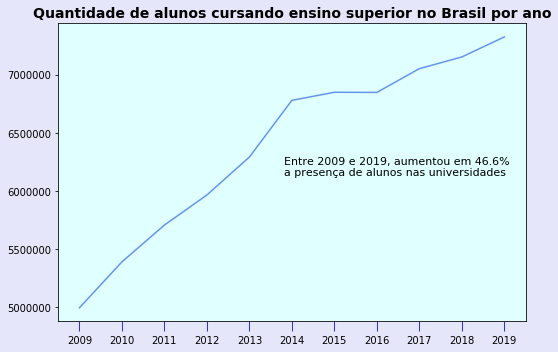

In [3]:
# Evolução da quantidade de alunos nas universidades de 2009 a 2019

df_plot = df[['NU_ANO_CENSO', 'QTDE_ALUNOS']].groupby('NU_ANO_CENSO').sum().reset_index()

font = "DejaVu Sans"

fig, ax = plt.subplots(figsize=(8,5))
fig.set_facecolor("lavender")
ax.patch.set_facecolor("#e0ffff")

ax.set_title("Quantidade de alunos cursando ensino superior no Brasil por ano", 
             fontsize=14, fontweight='bold', fontfamily=font)
x = df_plot['NU_ANO_CENSO']
y = df_plot['QTDE_ALUNOS'] 
ax.plot(x, y, color='cornflowerblue')

total_2019 = int(df_plot[df_plot['NU_ANO_CENSO']==2019]['QTDE_ALUNOS'])
total_2009 = int(df_plot[df_plot['NU_ANO_CENSO']==2009]['QTDE_ALUNOS'])
fig.text(0.5, 0.5, 
         'Entre 2009 e 2019, aumentou em %.1f%% \na presença de alunos nas universidades' % (100*(total_2019/total_2009-1)), 
         fontfamily=font, fontsize=11)

ax.tick_params(axis="x", color="blue", length=10)

plt.xticks(df_plot['NU_ANO_CENSO'])
plt.yticks(np.arange(5000000, 7500000, 500000))
plt.tight_layout()

plt.savefig('plots/geral_brasil.png',
            bbox_inches='tight', dpi=1200)
plt.show()

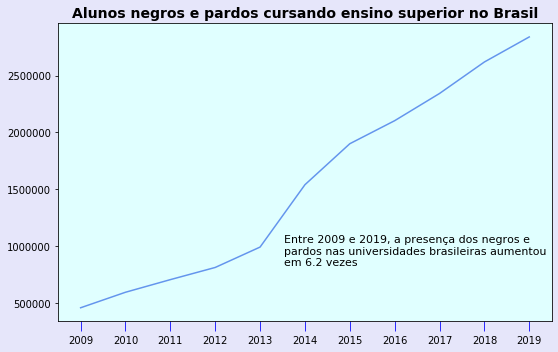

In [4]:
# Evolução da quantidade de alunos negros e pardos nas universidades de 2009 a 2019

df_plot = df[df['TP_COR_RACA'].isin([2,3])][['NU_ANO_CENSO', 'QTDE_ALUNOS']].groupby('NU_ANO_CENSO').sum().reset_index()

font = "DejaVu Sans"

fig, ax = plt.subplots(figsize=(8,5))
fig.set_facecolor("lavender")
ax.patch.set_facecolor("#e0ffff")
#ax.grid()
ax.set_title("Alunos negros e pardos cursando ensino superior no Brasil", 
             fontsize=14, fontweight='bold', fontfamily=font)
x = df_plot['NU_ANO_CENSO']
y = df_plot['QTDE_ALUNOS'] 
ax.plot(x, y, color='cornflowerblue')

total_2019 = int(df_plot[df_plot['NU_ANO_CENSO']==2019]['QTDE_ALUNOS'])
total_2009 = int(df_plot[df_plot['NU_ANO_CENSO']==2009]['QTDE_ALUNOS'])
fig.text(0.5, 0.25, 
         'Entre 2009 e 2019, a presença dos negros e \npardos nas universidades \
brasileiras aumentou \nem %.1f vezes' % (total_2019/total_2009), 
         fontfamily=font, fontsize=11)

ax.tick_params(axis="x", color="blue", length=10)

plt.xticks(x)

plt.tight_layout()

plt.savefig('plots/geral_negros_brasil.png',
            bbox_inches='tight', dpi=300)
plt.show()

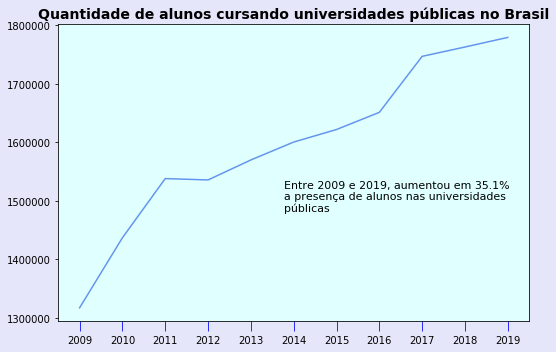

In [5]:
# Evolução da quantidade de alunos nas universidades públicas de 2009 a 2019

df_plot = df[df['TP_CATEGORIA_ADMINISTRATIVA'].isin([1, 2, 3])][['NU_ANO_CENSO', 'QTDE_ALUNOS']].groupby('NU_ANO_CENSO').sum().reset_index()

font = "DejaVu Sans"

fig, ax = plt.subplots(figsize=(8,5))
fig.set_facecolor("lavender")
ax.patch.set_facecolor("#e0ffff")

ax.set_title("Quantidade de alunos cursando universidades públicas no Brasil", 
             fontsize=14, fontweight='bold', fontfamily=font)
x = df_plot['NU_ANO_CENSO']
y = df_plot['QTDE_ALUNOS'] 
ax.plot(x, y, color='cornflowerblue')

total_2019 = int(df_plot[df_plot['NU_ANO_CENSO']==2019]['QTDE_ALUNOS'])
total_2009 = int(df_plot[df_plot['NU_ANO_CENSO']==2009]['QTDE_ALUNOS'])
fig.text(0.5, 0.4, 
         'Entre 2009 e 2019, aumentou em %.1f%% \na presença de alunos nas universidades \npúblicas' % (100*(total_2019/total_2009-1)), 
         fontfamily=font, fontsize=11)

ax.tick_params(axis="x", color="blue", length=10)

plt.xticks(df_plot['NU_ANO_CENSO'])
plt.tight_layout()

plt.savefig('plots/publicas_brasil.png',
            bbox_inches='tight', dpi=300)
plt.show()

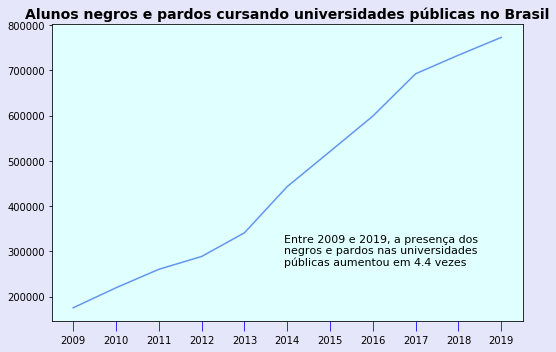

In [6]:
# Evolução da quantidade de alunos negros e pardos nas universidades públicas de 2009 a 2019

df_plot = df[(df['TP_CATEGORIA_ADMINISTRATIVA'].isin([1, 2, 3])) & (df['TP_COR_RACA'].isin([2,3]))][['NU_ANO_CENSO', 'QTDE_ALUNOS']].groupby('NU_ANO_CENSO').sum().reset_index()

fig, ax = plt.subplots(figsize=(8,5))
fig.set_facecolor("lavender")
ax.patch.set_facecolor("#e0ffff")
font = "DejaVu Sans"
ax.set_title("Alunos negros e pardos cursando universidades públicas no Brasil", 
             fontsize=14, fontweight='bold', fontfamily=font)
x = df_plot['NU_ANO_CENSO']
y = df_plot['QTDE_ALUNOS'] 
ax.plot(x, y, color='cornflowerblue')

total_2019 = int(df_plot[df_plot['NU_ANO_CENSO']==2019]['QTDE_ALUNOS'])
total_2009 = int(df_plot[df_plot['NU_ANO_CENSO']==2009]['QTDE_ALUNOS'])
fig.text(0.5, 0.25, 
         'Entre 2009 e 2019, a presença dos \nnegros e pardos nas universidades \n\
públicas aumentou em %.1f vezes' % (total_2019/total_2009), 
         fontfamily=font, fontsize=11)

ax.tick_params(axis="x", color="blue", length=10)
plt.xticks(x)
plt.tight_layout()
plt.savefig('plots/publicas_negros_brasil.png',
            bbox_inches='tight', dpi=300)
plt.show()

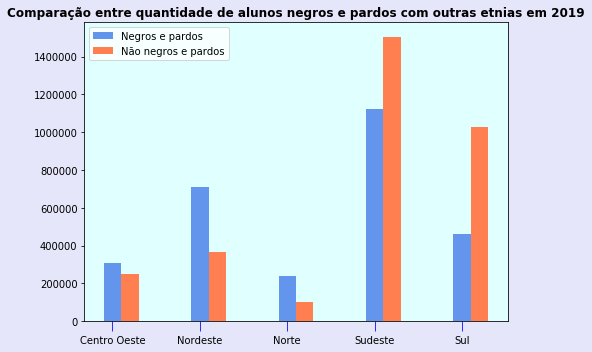

In [8]:
# Análise do censo universitário por região do Brasil

# Manipulação dos dados para gerar informação de alunos por região
arquivo_ies = 'Microdados_Educação_Superior_2019/dados/SUP_IES_2019.csv'
df_ies_regiao = pd.read_csv(arquivo_ies, sep='|', encoding='latin')
df_ies_regiao = df_ies_regiao[['CO_IES', 'CO_REGIAO']].drop_duplicates().dropna()
de_para_regiao = {1: 'Norte', 2: 'Nordeste', 3: 'Sudeste', 4: 'Sul', 5: 'Centro Oeste'}
df_ies_regiao['NO_REGIAO'] = [de_para_regiao[i] for i in df_ies_regiao['CO_REGIAO']]

df_regiao = df.merge(df_ies_regiao, on='CO_IES')[['NU_ANO_CENSO', 'TP_COR_RACA', 'NO_REGIAO', 'QTDE_ALUNOS']].groupby(['NU_ANO_CENSO', 'TP_COR_RACA', 'NO_REGIAO']).sum().reset_index()
df_regiao = df_regiao[(~df_regiao['TP_COR_RACA'].isin([0,9])) & (df_regiao['NU_ANO_CENSO']==2019)] #filtro 2019 e excluindo registros sem informação de raça/cor ou não se declararam
df_regiao['NEGROS_PARDOS'] = [0 if (i != 2) & (i!= 3) else 1 for i in df_regiao['TP_COR_RACA']]
df_regiao = df_regiao.groupby(['NO_REGIAO', 'NEGROS_PARDOS']).sum()['QTDE_ALUNOS'].reset_index()
df_regiao['PROPORCAO'] = df_regiao.groupby(['NO_REGIAO', 'NEGROS_PARDOS']).sum().groupby(level=0).apply(lambda x: x / float(x.sum())).reset_index()['QTDE_ALUNOS']

# Gerando gráfico para visualização dos dados
fig, ax = plt.subplots(figsize=(8,5))
fig.set_facecolor("lavender")
ax.patch.set_facecolor("#e0ffff")
font = "DejaVu Sans"
ax.set_title("Comparação entre quantidade de alunos negros e pardos com outras etnias em 2019", 
             fontsize=12, fontweight='bold', fontfamily=font)

labels = df_regiao['NO_REGIAO'].unique()
x = np.arange(len(labels))
y1 = df_regiao[df_regiao['NEGROS_PARDOS']==1]['QTDE_ALUNOS'].reset_index(drop=True) 
y0 = df_regiao[df_regiao['NEGROS_PARDOS']==0]['QTDE_ALUNOS'].reset_index(drop=True)
proporcao1 = df_regiao[df_regiao['NEGROS_PARDOS']==1]['PROPORCAO'].reset_index(drop=True) 
proporcao0 = df_regiao[df_regiao['NEGROS_PARDOS']==0]['PROPORCAO'].reset_index(drop=True) 

width=0.2

ax1 = ax.bar(x, y1, width, color='cornflowerblue', align='center')
ax0 = ax.bar(x+width, y0, width, color='coral', align='center')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis="x", color="blue", length=10)
plt.legend([ax1, ax0],['Negros e pardos', 'Não negros e pardos'])
plt.tight_layout()
plt.savefig('plots/raca_cor_por_regiao.png',
            bbox_inches='tight', dpi=300)
plt.show()